#Task 2 (Work with Dates)
you are working in metro station and your manager askes you get to him which day have more entries in the turnstiles this is turnstiles
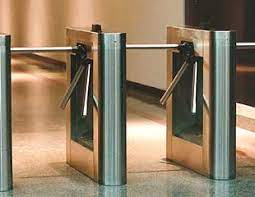

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 25\Assigment\datasets\turnstile_220319.csv')

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,03:00:00,REGULAR,7693605,2677444
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,07:00:00,REGULAR,7693608,2677454
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,11:00:00,REGULAR,7693627,2677547
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,15:00:00,REGULAR,7693672,2677621
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,19:00:00,REGULAR,7693730,2677683


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207556 entries, 0 to 207555
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   207556 non-null  object
 1   UNIT                                                                  207556 non-null  object
 2   SCP                                                                   207556 non-null  object
 3   STATION                                                               207556 non-null  object
 4   LINENAME                                                              207556 non-null  object
 5   DIVISION                                                              207556 non-null  object
 6   DATE                                                                  207556 non-null  objec

# as we see above the data time is object so we can`t extract imformation from it so we need first to creat a new column to combine data and time together and after that convert them to data time format to extract the name of day

In [5]:
# Take the date and time fields into a single datetime column
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,03:00:00,REGULAR,7693605,2677444,2022-03-12 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,07:00:00,REGULAR,7693608,2677454,2022-03-12 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,11:00:00,REGULAR,7693627,2677547,2022-03-12 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,15:00:00,REGULAR,7693672,2677621,2022-03-12 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,19:00:00,REGULAR,7693730,2677683,2022-03-12 19:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207556 entries, 0 to 207555
Data columns (total 12 columns):
 #   Column                                                                Non-Null Count   Dtype         
---  ------                                                                --------------   -----         
 0   C/A                                                                   207556 non-null  object        
 1   UNIT                                                                  207556 non-null  object        
 2   SCP                                                                   207556 non-null  object        
 3   STATION                                                               207556 non-null  object        
 4   LINENAME                                                              207556 non-null  object        
 5   DIVISION                                                              207556 non-null  object        
 6   DATE                        

# creat a new column to extract the name of day so to solve your task

In [8]:
df['week_day']=df['DATE_TIME'].dt.day_name()

In [9]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,week_day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,03:00:00,REGULAR,7693605,2677444,2022-03-12 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,07:00:00,REGULAR,7693608,2677454,2022-03-12 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,11:00:00,REGULAR,7693627,2677547,2022-03-12 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,15:00:00,REGULAR,7693672,2677621,2022-03-12 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,19:00:00,REGULAR,7693730,2677683,2022-03-12 19:00:00,Saturday


# now it`s time to see the most day have the biggest number of entries

In [10]:
x=df.groupby('week_day')[['ENTRIES']].sum().sort_values(by='ENTRIES',ascending=False)

<Axes: xlabel='week_day', ylabel='ENTRIES'>

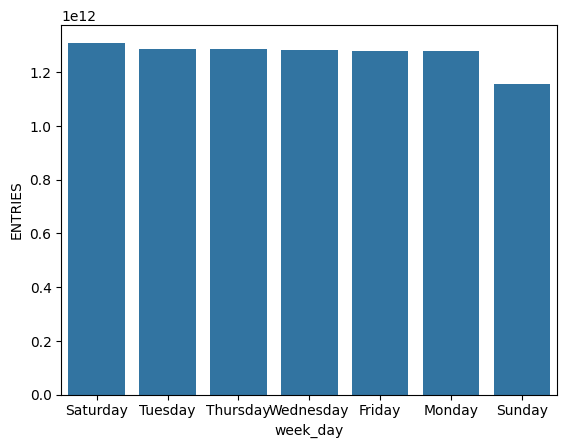

In [13]:
import seaborn as sns
sns.barplot(x.ENTRIES)